# Import Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# read the csv file

In [89]:
data1=pd.read_csv("kyphosis.csv")

# Data Visualization and Exploration

a.    Print at least 5 rows for sanity check to identify all the features present in the dataset and
       if the target matches with them.

In [90]:
data1.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


b.    Print the description and shape of the dataset.

In [91]:
data1.shape

(81, 4)

In [92]:
data1.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


C.  Provide appropriate visualization to get an insight about the dataset.

In [93]:
data1.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [94]:
data1.info

<bound method DataFrame.info of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]>

d.   Try exploring the data and see what insights can be drawn from the dataset.


<AxesSubplot:xlabel='Kyphosis', ylabel='Start'>

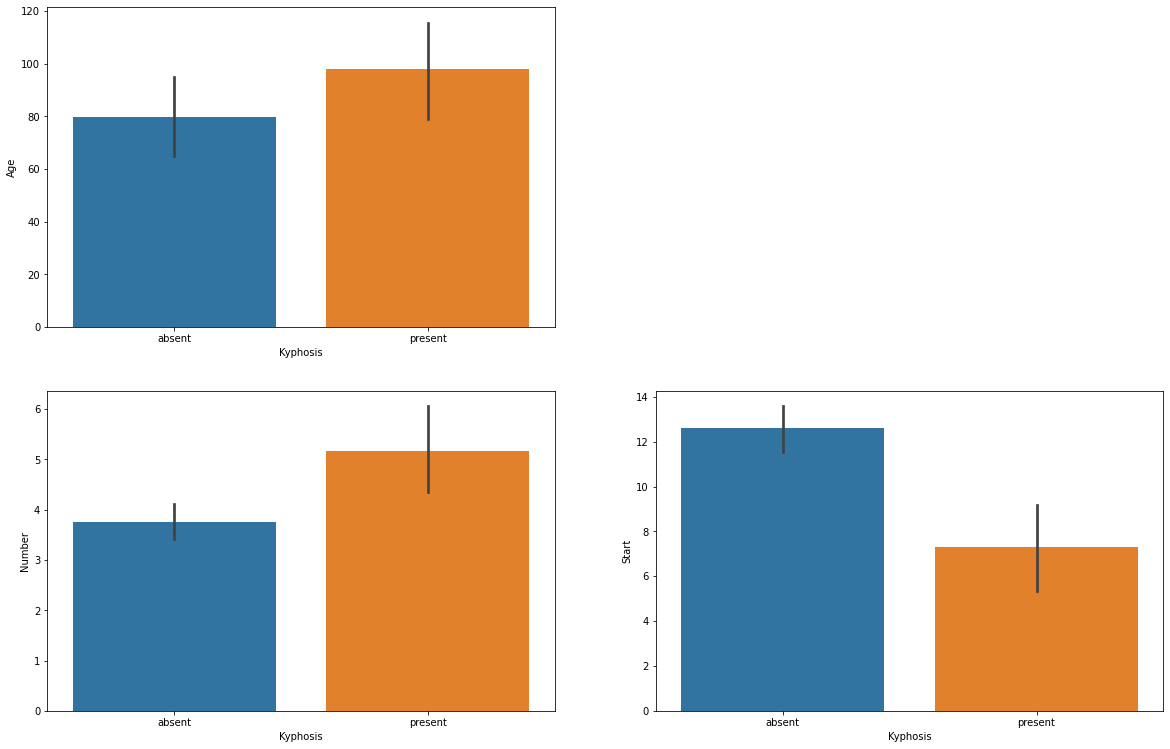

In [95]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
sns.barplot(y= 'Age', x = 'Kyphosis', data = data1)
plt.subplot(323)
sns.barplot(y = 'Number', x= 'Kyphosis', data = data1)
plt.subplot(324)
sns.barplot(y= 'Start', x = 'Kyphosis', data = data1)


<AxesSubplot:xlabel='Age', ylabel='count'>

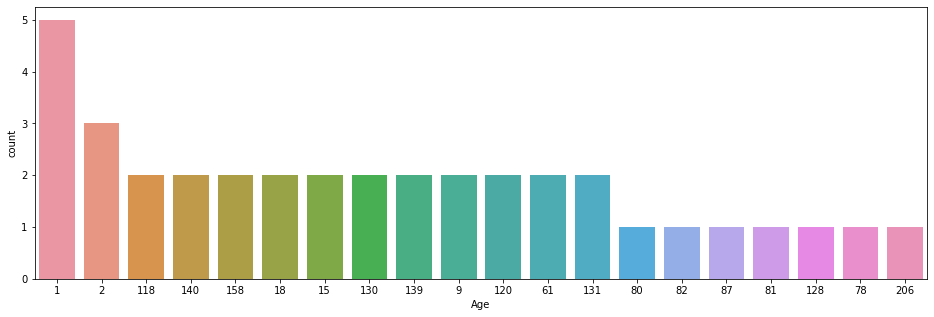

In [96]:
plt.figure(figsize=(16,5))
sns.countplot(x='Age',data = data1,order = data1['Age'].value_counts().iloc[:20].index)

# Data Pre-processing and cleaning

a.      Do the appropriate preprocessing of the data like identifying NULL or Missing Values if
        any . 

In [97]:
data1.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

there is no Missing values,so we already have a clean data in terms of a missing value

b.     handling of outliers if present in the dataset, skewed data etc

C:\Users\Computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

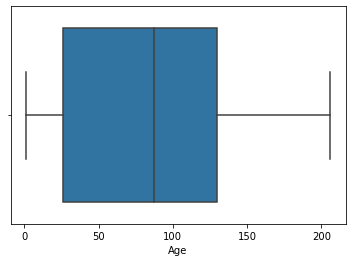

In [98]:
sns.boxplot(data1["Age"],orient='h')

C.   visualization

In [99]:
data1['Age'].unique()

array([ 71, 158, 128,   2,   1,  61,  37, 113,  59,  82, 148,  18, 168,
        78, 175,  80,  27,  22, 105,  96, 131,  15,   9,   8, 100,   4,
       151,  31, 125, 130, 112, 140,  93,  52,  20,  91,  73,  35, 143,
        97, 139, 136, 121, 177,  68,  72, 120,  51, 102, 114,  81, 118,
        17, 195, 159, 127,  87, 206,  11, 178, 157,  26,  42,  36],
      dtype=int64)

In [100]:
data1['Kyphosis'].unique()

array(['absent', 'present'], dtype=object)

In [101]:
data1['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [102]:
for col in data1:
     if(col=='Kyphosis'):
            data1[col]= data1[col].map({'absent':0,'present':1})
            

In [106]:
data1['Kyphosis'].value_counts()

0    64
1    17
Name: Kyphosis, dtype: int64

In [107]:
data2=data1

In [108]:
data3=data1

# Data Preparation

a.    Do the final feature selection and extract them into Column X and the class label into
      Column into Y.

In [109]:
x=data1.drop(['Kyphosis'],axis=1)
y=data1['Kyphosis']

In [110]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


b.   Split the dataset into training and test sets.

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [112]:
x_train.shape,x_test.shape

((64, 3), (17, 3))

# Model Building

# LinearRegression

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [115]:
y_pred=reg.predict(x_test)

In [116]:
from sklearn import metrics 
mse=metrics.mean_squared_error(y_test,y_pred)
print("Mean_squared_error:",mse)


Mean_squared_error: 0.08278527000514618


In [117]:
rmse=np.sqrt(mse)
print("Root_Mean_squared_Error:",rmse)

Root_Mean_squared_Error: 0.2877242951249445


In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data1_scaled = scaler.fit_transform(data1)

In [119]:
print(data1_scaled.mean(axis=0))
print(data1_scaled.std(axis=0))

[-4.11193713e-18  1.00057137e-16 -1.36550579e-16 -9.04626168e-17]
[1. 1. 1. 1.]


In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data1_scaled = scaler.fit_transform(data1)

In [121]:
print('means (Age, Number and Start): ', data1_scaled.mean(axis=0))
print('std (Age, Number and Start): ', data1_scaled.std(axis=0))

means (Age, Number and Start):  [0.20987654 0.40319181 0.25617284 0.61728395]
std (Age, Number and Start):  [0.40722031 0.28168034 0.20117444 0.28551298]


# LogisticRegression

In [122]:
x=data2.drop(['Kyphosis'],axis=1)
y=data2['Kyphosis']

In [123]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
log_reg = LogisticRegression()

In [128]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [129]:
y_pred=log_reg.predict(x_test)

In [130]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

In [132]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy_Score:", acc)

Accuracy_Score: 0.8823529411764706


In [133]:
confusion_matrix(y_test, y_pred)

array([[13,  2],
       [ 0,  2]], dtype=int64)

# K-Nearst Neighbor

In [134]:
x=data3.drop(['Kyphosis'],axis=1)
y=data3['Kyphosis']

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [137]:

from sklearn.metrics import accuracy_score, confusion_matrix
k_range=list(range(3,10))
acc=[]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    acc.append(metrics.accuracy_score(y_test,y_pred))

In [138]:
acc

[0.7647058823529411,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765,
 0.7058823529411765]